In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
df_calendar = pd.read_csv('data/calendar.csv')
df_listings = pd.read_csv('data/listings.csv')
df_reviews = pd.read_csv('data/reviews.csv')

print(df_calendar.head())


   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


In [3]:
print(df_reviews.head())

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  


In [4]:
print(df_listings.head())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [5]:
df_1 = pd.merge(df_calendar, df_reviews, how = 'inner', left_on = 'listing_id', right_on = 'listing_id')
df_1.head()

,listing_id,date_x,available,price,id,date_y,reviewer_id,reviewer_name,comments
0,241032,2016-01-04,t,$85.00,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,2016-01-04,t,$85.00,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
2,241032,2016-01-04,t,$85.00,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
3,241032,2016-01-04,t,$85.00,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,2016-01-04,t,$85.00,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...


In [6]:
df = pd.merge(df_1, df_listings[['id','review_scores_value','reviews_per_month','cancellation_policy']], how = 'inner', left_on = 'listing_id', right_on = 'id')
df.head()

,listing_id,date_x,available,price,id_x,date_y,reviewer_id,reviewer_name,comments,id_y,review_scores_value,reviews_per_month,cancellation_policy
0,241032,2016-01-04,t,$85.00,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...,241032,10.0,4.07,moderate
1,241032,2016-01-04,t,$85.00,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...,241032,10.0,4.07,moderate
2,241032,2016-01-04,t,$85.00,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...,241032,10.0,4.07,moderate
3,241032,2016-01-04,t,$85.00,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien...",241032,10.0,4.07,moderate
4,241032,2016-01-04,t,$85.00,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...,241032,10.0,4.07,moderate


This is a very large data set, so the purpose of this assignment, I will drop a few columns that will not be used in answering the business questions. There are insights to be drawn from there if needed, such as doing sentiment analysis on comments and etc, but not for this assignment.

In [7]:
df.drop(['id_x','id_y','comments','reviewer_name'], axis =1, inplace = True)
df.head()

,listing_id,date_x,available,price,date_y,reviewer_id,review_scores_value,reviews_per_month,cancellation_policy
0,241032,2016-01-04,t,$85.00,2011-11-01,479824,10.0,4.07,moderate
1,241032,2016-01-04,t,$85.00,2011-11-04,357699,10.0,4.07,moderate
2,241032,2016-01-04,t,$85.00,2011-11-08,1285567,10.0,4.07,moderate
3,241032,2016-01-04,t,$85.00,2011-11-14,647857,10.0,4.07,moderate
4,241032,2016-01-04,t,$85.00,2011-11-19,1389821,10.0,4.07,moderate


In [53]:
# My laptop can't handle training data on this whole dataset, so for the purpose of this assignment, 
# I created a sample dataset that is small enough for my laptop. I fully understand that it will affect my model's accuracy due to the smaller sample size.

df1 = df.sample(frac=0.01,random_state = 42)

### 1. How many reviewers are there in total in this data set, what's the average reivew per listing? What's the average score?

In [48]:
#To calculate the number of unique reviewers in this sample dataset

df1['reviewer_id'].nunique()

65196

In [54]:
#To calculate the average review submitted per reviewer. This could be used to analyze how much per person rating bias could be introduced with the review score.

df1.shape[0]/df['reviewer_id'].nunique()

4.08951538359963

In [55]:
#This is to calculate the average scores of the dataset

df1['review_scores_value'].mean()

9.502225567212776

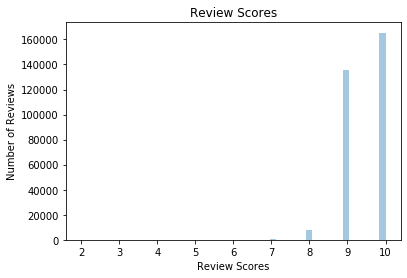

In [56]:
#This is to understand how scores are allocated across the range, in order to understand the spread difference

fig = sns.distplot(df1['review_scores_value'], kde = False)
plt.xlabel('Review Scores')
plt.ylabel('Number of Reviews')
plt.title('Review Scores')
plt.show()

### 2. What's the average price of the listings?

In [13]:
df1.dropna(subset= ['price'], inplace = True)

In [14]:
df1.reset_index(inplace = True)

In [15]:
df1['price']

0         $300.00
1          $55.00
2         $488.00
3          $70.00
4          $45.00
           ...   
224680    $105.00
224681     $75.00
224682    $150.00
224683     $40.00
224684    $120.00
Name: price, Length: 224685, dtype: object

In [16]:
df1.dtypes

index                    int64
listing_id               int64
date_x                  object
available               object
price                   object
date_y                  object
reviewer_id              int64
review_scores_value    float64
reviews_per_month      float64
cancellation_policy     object
dtype: object

In here, I want to clean the dataset a bit more by including prices below 100 and convert them to numeric value from object

In [17]:
df_clean = df1.drop(df1.loc[df1['price'].str.contains(",")==1].index)

In [18]:
df_clean['price']= df_clean['price'].str[1:].str[:2].astype('int')

In [19]:
df_clean.describe()

,index,listing_id,price,reviewer_id,review_scores_value,reviews_per_month
count,2.246200e+05,2.246200e+05,224620.000000,2.246200e+05,224542.000000,224620.000000
mean,1.562231e+07,2.854125e+06,47.426801,1.681687e+07,9.484747,3.615925
std,8.949416e+06,2.407710e+06,31.640681,1.344859e+07,0.567949,2.224391
min,1.900000e+01,4.291000e+03,10.000000,1.500000e+01,4.000000,0.020000
25%,7.828779e+06,7.692130e+05,15.000000,4.984170e+06,9.000000,1.900000
50%,1.563820e+07,2.260626e+06,49.000000,1.389625e+07,10.000000,3.250000
75%,2.345269e+07,4.384343e+06,75.000000,2.735218e+07,10.000000,4.930000
max,3.096988e+07,1.002022e+07,99.000000,5.279073e+07,10.000000,12.150000


The average price in this dataset of airbnbs is $47.42

## 3. Use categorical and numeric values to predict the price of the airbnb

In [20]:
df_clean.head()

,index,listing_id,date_x,available,price,date_y,reviewer_id,review_scores_value,reviews_per_month,cancellation_policy
0,28650764,1547337,2016-09-11,t,30,2014-10-14,1200752,9.0,1.99,strict
1,24414076,975179,2016-06-05,t,55,2016-01-01,50874405,9.0,4.93,moderate
2,8715403,934216,2016-08-06,t,48,2015-06-03,33897961,9.0,0.68,strict
3,804226,2487892,2016-09-29,t,70,2014-11-23,22930591,10.0,3.46,flexible
4,381240,3200646,2016-11-11,t,45,2015-04-13,28414832,9.0,4.38,strict


In [21]:
df_price = df_clean.drop(columns = ['index', 'listing_id', 'date_x', 'available', 'date_y'])

In [22]:
df_price.head()

,price,reviewer_id,review_scores_value,reviews_per_month,cancellation_policy
0,30,1200752,9.0,1.99,strict
1,55,50874405,9.0,4.93,moderate
2,48,33897961,9.0,0.68,strict
3,70,22930591,10.0,3.46,flexible
4,45,28414832,9.0,4.38,strict


In [23]:
df_price.isna().sum()

price                   0
reviewer_id             0
review_scores_value    78
reviews_per_month       0
cancellation_policy     0
dtype: int64

In [27]:
df_price['review_scores_value'].fillna(df_price['review_scores_value'].mean(), inplace = True)

In [28]:
df_price.isna().sum()

price                  0
reviewer_id            0
review_scores_value    0
reviews_per_month      0
cancellation_policy    0
dtype: int64

In [32]:
df_lm = pd.get_dummies(df_price)

In [33]:
X = df_lm.drop(columns = ['price'])
y = df_lm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize = True)

lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.052521495680188046

There could be two reasons why this result is not good. The first is that perhaps review score, cancellation policies and etc are not strong indicators of price. The second could be that we are only using 1% of the overall dataset, so we are drawing conclusions based on very limited data. Since this is an assignment used to demonstrate the skills not a real-life business case where results are important, the 0.05 r square score is acceptable.